# PREDICTION ON BRAIN STROKE

## 1. EDA

In [382]:
# Packages installed with Python 3 environment

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


# List all files under the input directory
import os
for dirname, _, filenames in os.walk('Desktop/brain stroke'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Desktop/brain stroke/full_data.csv
Desktop/brain stroke/full_filled_stroke_data (1).csv


In [383]:
df = pd.read_csv('Desktop/brain stroke/full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [385]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [386]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [387]:
df['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

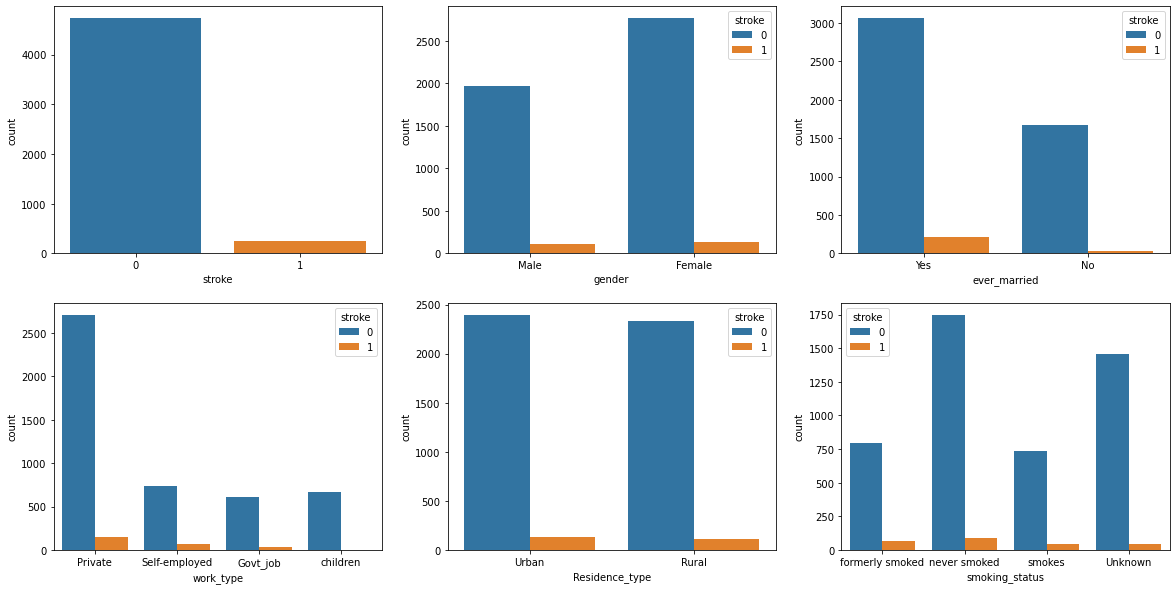

In [388]:
fig = plt.figure(figsize = (20,10))

plt.subplot(2, 3, 1)
sns.countplot(x = 'stroke', data = df)

plt.subplot(2, 3, 2)
sns.countplot(x = 'gender', data=df, hue = 'stroke')

plt.subplot(2, 3, 3)
sns.countplot(x = 'ever_married', data = df, hue = 'stroke')

plt.subplot(2, 3, 4)
sns.countplot(x = 'work_type', data= df, hue = 'stroke')

plt.subplot(2, 3, 5)
sns.countplot(x = 'Residence_type', data=df, hue = 'stroke')

plt.subplot(2, 3, 6)
sns.countplot(x = 'smoking_status', data=df, hue= 'stroke')



<AxesSubplot:>

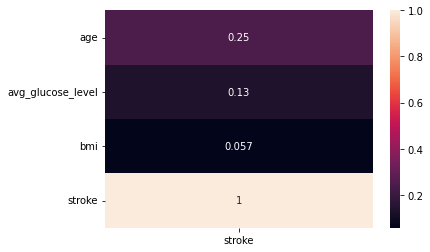

In [389]:
df_numerical = df.drop(['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status'], axis=1)

sns.heatmap(df_numerical.corr()[['stroke']], annot=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

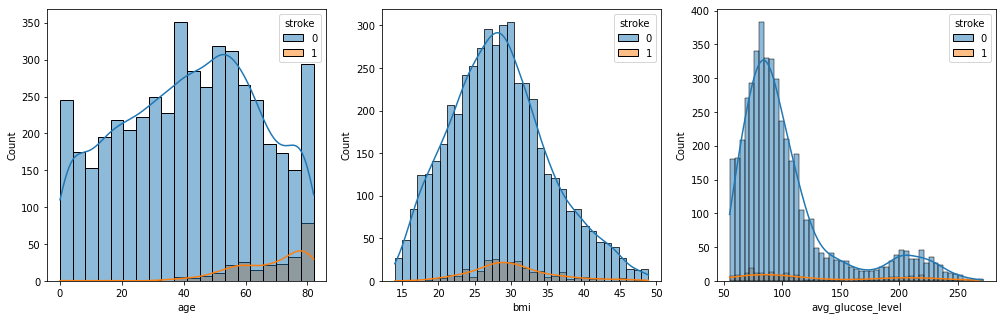

In [390]:
fig = plt.figure(figsize = (17,5))

plt.subplot(1, 3, 1)
sns.histplot(x='age', data=df, hue='stroke', kde=True)

plt.subplot(1, 3, 2)
sns.histplot(x='bmi', data=df, hue='stroke', kde=True)

plt.subplot(1, 3, 3)
sns.histplot(x='avg_glucose_level', data=df, hue='stroke', kde=True)

## 2. DATA PROCESSING

In [391]:
from sklearn.preprocessing import StandardScaler

In [392]:
X_quality = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']]
X_quantity = df.drop(['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis=1)

In [393]:
#setting dummy variables

X_quality = pd.get_dummies(X_quality) 

In [394]:
X_quality.head()

,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [395]:
# Standardization

scaler = StandardScaler()
scaler.fit(X_quantity)
X_scaled = scaler.transform(X_quantity)
X_scaled = pd.DataFrame(X_scaled, index=X_quantity.index, columns=X_quantity.columns)
X_scaled

,age,avg_glucose_level,bmi
0,1.040584,2.723411,1.193238
1,1.614270,-0.000523,0.589390
2,0.246250,1.448529,0.869222
3,1.570141,1.512650,-0.662492
4,1.658400,1.780895,0.073909
...,...,...,...
4976,-0.106788,-0.794162,0.191733
4977,-0.150917,1.890500,0.383197
4978,0.069731,-0.242364,0.486294
4979,-0.150917,-0.488199,0.221189


In [396]:
# Combination, get train dataset X and y
X = pd.concat([X_scaled, X_quality], axis=1)
y=df['stroke']
X

,age,avg_glucose_level,bmi,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.040584,2.723411,1.193238,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,1.614270,-0.000523,0.589390,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,0.246250,1.448529,0.869222,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1.570141,1.512650,-0.662492,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,1.658400,1.780895,0.073909,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,-0.106788,-0.794162,0.191733,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
4977,-0.150917,1.890500,0.383197,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4978,0.069731,-0.242364,0.486294,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
4979,-0.150917,-0.488199,0.221189,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1


## 3. TRYING DIFFERENT MODELS

### 3.1 XGBoost

In [397]:
# %pip install xgboost

In [398]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [399]:
# spliting training dataset and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('Training dataset amount:', X_train['age'].count())
print('Testing dataset amount:',X_test['age'].count())

Training dataset amount: 3486
Testing dataset amount: 1495


In [400]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [401]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1418
           1       0.08      0.01      0.02        77

    accuracy                           0.94      1495
   macro avg       0.52      0.50      0.50      1495
weighted avg       0.90      0.94      0.92      1495



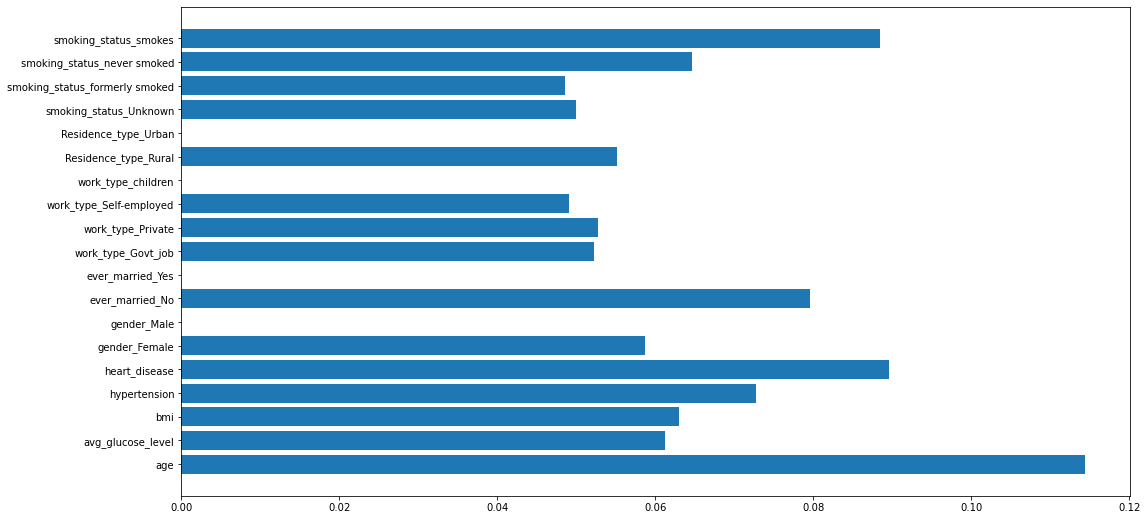

In [402]:
# show important features

fig = plt.figure(figsize=(17,9))
plt.barh(X.columns, model_xgb.feature_importances_)
plt.show()

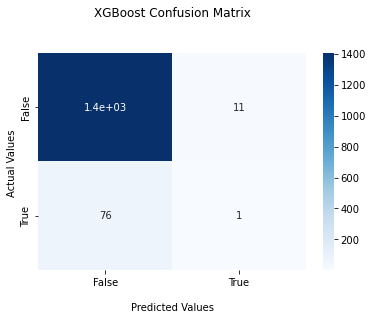

In [403]:
cm = confusion_matrix(y_test, pred)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('XGBoost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [404]:
# Record scores of each model
scores = []

xg_score = float(str(accuracy_score(y_test, pred) * 100)[:5])
scores.append(('XGBoost',xg_score))

In [405]:
# prediction on brain stroke patients does not perform well, the precision is only 0.08
# need to consider hyperparameter tuning
# will do this task latter

### 3.2 Logistic Regression

In [406]:
from sklearn.linear_model import LogisticRegression


In [407]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [408]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1418
           1       1.00      0.01      0.03        77

    accuracy                           0.95      1495
   macro avg       0.97      0.51      0.50      1495
weighted avg       0.95      0.95      0.93      1495



In [409]:
cm = confusion_matrix(y_test, y_pred)

lr_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
scores.append(('Logistic Regression',lr_score))
lr_score

94.91

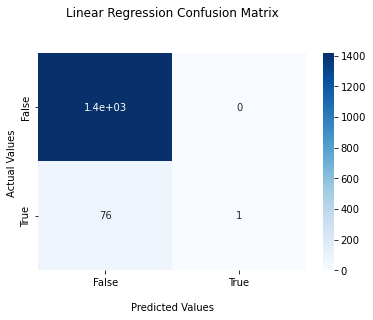

In [410]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Linear Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 3.3 Decision Tree

In [411]:
from sklearn.tree import DecisionTreeClassifier

In [412]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [413]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1418
           1       0.14      0.14      0.14        77

    accuracy                           0.91      1495
   macro avg       0.55      0.55      0.55      1495
weighted avg       0.91      0.91      0.91      1495



In [414]:
cm = confusion_matrix(y_test, y_pred)

dtc_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
scores.append(('Decision Tree',dtc_score))

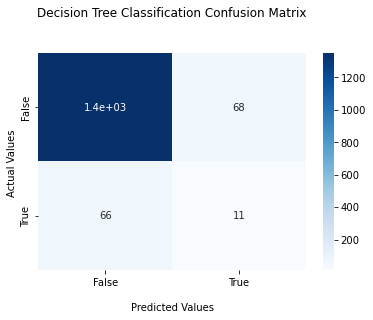

In [415]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Decision Tree Classification Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()


### 3.4 Random Forest

In [416]:
from sklearn.ensemble import RandomForestClassifier


In [417]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [418]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1418
           1       0.12      0.01      0.02        77

    accuracy                           0.94      1495
   macro avg       0.54      0.50      0.50      1495
weighted avg       0.91      0.94      0.92      1495



In [419]:
cm = confusion_matrix(y_test, y_pred)

rfc_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
scores.append(('Random Forest',rfc_score))

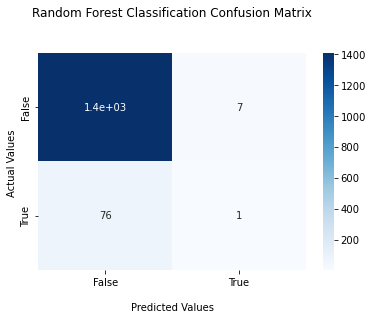

In [420]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Random Forest Classification Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 3.5 SVM

In [421]:
from sklearn.svm import SVC


In [422]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [423]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1418
           1       0.12      0.10      0.11        77

    accuracy                           0.91      1495
   macro avg       0.53      0.53      0.53      1495
weighted avg       0.91      0.91      0.91      1495



In [424]:
cm = confusion_matrix(y_test, y_pred)

svm_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
scores.append(('SVM',svm_score))

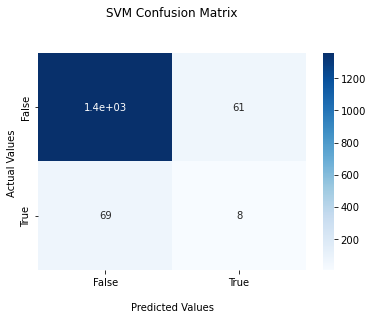

In [425]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('SVM Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 3.6 KNN

In [426]:
from sklearn.neighbors import KNeighborsClassifier

In [427]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [428]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1418
           1       0.00      0.00      0.00        77

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



In [429]:
cm = confusion_matrix(y_test, y_pred)

knn_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
scores.append(('KNN',knn_score))

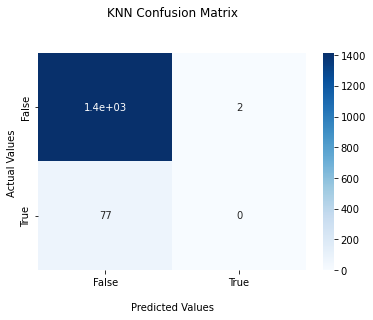

In [430]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('KNN Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## 4. Comparation

In [431]:
scores = pd.DataFrame(scores,columns=['Model','Score'])

from IPython.display import display

display(scores)

,Model,Score
0,XGBoost,94.18
1,Logistic Regression,94.91
2,Decision Tree,91.03
3,Random Forest,94.44
4,SVM,91.30
5,KNN,94.71


## 5. Conclusion

Among the models tried above, Logistic Regression has a better performance. But after finishing this chapter, two important questions need to be considered deeply in order to get better prediction. 


(i) the dataset is unbalanced, the amount of patients with brain stroke(1) is far smaller than the amount of 0; should we consider some resample methods to balance the training dataset?

(ii) hyperparameter tuning for each model

#### I will do these work in the next chapter.